# Data Preprocessing - Parte 3 (Temporal Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep=',')
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def summarize_data(data):
    """Generate summary statistics of the DataFrame."""
    if data is not None:
        summary = data.describe()
        print("Data summary:")
        print(summary)
        return summary
    else:
        print("No data to summarize.")
        return None

In [4]:
data = load_data("../data/section_3/indicators_afg.csv")
summary = summarize_data(data)

Data loaded successfully.
Data summary:
       Country Name Country ISO3   Year Indicator Name Indicator Code  Value
count         59730        59730  59730          59730          59730  59730
unique            2            2     66           3317           3318  34557
top     Afghanistan          AFG   2007  Net migration    SM.POP.NETM      0
freq          59729        59729   2330            195            195   3358


In [5]:
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008


In [7]:
# dropping the first row
# data = data.drop(index=0)
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008
5,Afghanistan,AFG,2019,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,535.52672808172


In [ ]:
# Transforming the 'Year' column to numeric type and 'Value' column to float type
data['Year'] = pd.to_numeric(data['Year'], errors='coerce') # integer type
data['Value'] = pd.to_numeric(data['Value'], errors='coerce') # float type

In [11]:
# Keeping the rows with 'Indicator Name' == 'Military expenditure (% of general government expenditure)'
data_military_expenditure = data[data['Indicator Name'] == 'Military expenditure (% of general government expenditure)']
data_military_expenditure.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
45674,Afghanistan,AFG,2021,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,10.502660
45675,Afghanistan,AFG,2020,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.972825
45676,Afghanistan,AFG,2019,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.275736
45677,Afghanistan,AFG,2018,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.724855
45678,Afghanistan,AFG,2017,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.652592


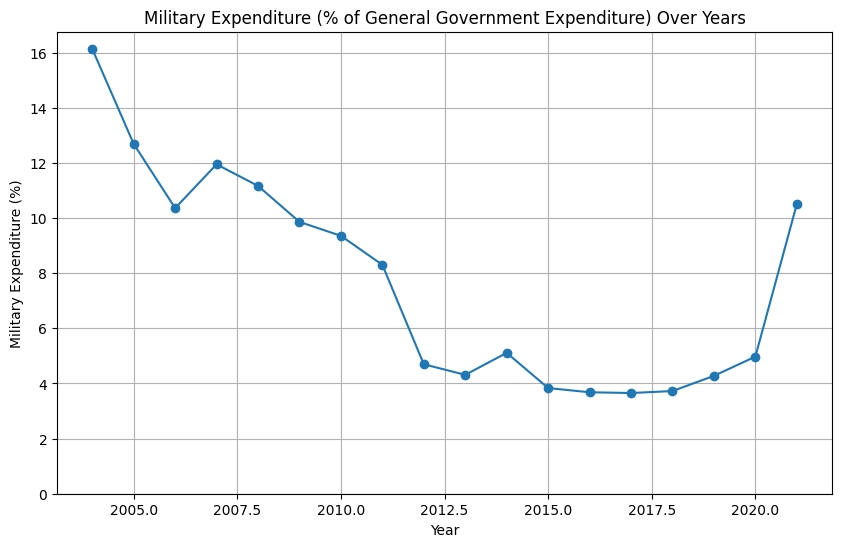

In [13]:
# Plotting line chart for Military Expenditure over the years using the columns 'Year' and 'Value'
# y-axis starting from 0
plt.figure(figsize=(10, 6))
plt.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o')
plt.title('Military Expenditure (% of General Government Expenditure) Over Years')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (%)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

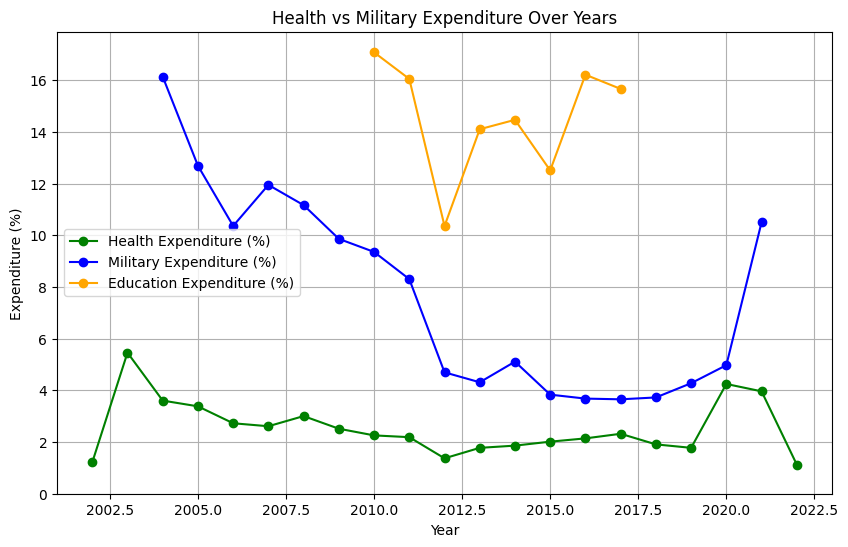

In [ ]:
# Plotting two lines: 'Domestic general government health expenditure (% of general government expenditure)' and 'Military expenditure (% of general government expenditure)'
data_health_expenditure = data[data['Indicator Name'] == 'Domestic general government health expenditure (% of general government expenditure)']
data_education_expenditure = data[data['Indicator Name'] == 'Government expenditure on education, total (% of government expenditure)']
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_health_expenditure['Year'], data_health_expenditure['Value'], marker='o', label='Health Expenditure (%)', color='green')
ax.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o', label='Military Expenditure (%)', color='blue')
ax.plot(data_education_expenditure['Year'], data_education_expenditure['Value'], marker='o', label='Education Expenditure (%)', color='orange')
ax.set_title('Health vs Military Expenditure Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure (%)')
ax.set_ylim(bottom=0)
ax.grid(True)
ax.legend()
plt.show()